# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../../EmLinesModel_Results'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_noshared.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_noshared.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [6]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-12.187872,107.652765,-218.487915,-0.068169,-0.014077,-4.562748,43.272291,-100.723852,0.205079,0.117344,...,5.041107,-59.315118,149.961612,-0.223876,-0.945536,-3.669918,27.459816,-46.362887,-0.397376,0.223145
1,-11.399028,96.402363,-194.169729,-0.350926,0.420846,-2.778258,31.618536,-96.240046,0.395766,0.047736,...,0.102390,-2.660499,-2.127995,0.121996,-0.345262,-2.291965,10.805416,5.558238,-0.632260,-0.059929
2,-10.597359,90.666617,-177.108472,-0.214381,-0.110351,-3.479320,30.153927,-70.409865,0.228308,0.102696,...,-3.142631,37.522926,-120.853234,-0.250283,-0.305395,-0.600042,-1.745767,15.866603,0.031647,0.151940
3,-8.879341,75.106981,-150.363251,0.065239,-0.060980,-1.344217,14.005408,-46.534047,0.358632,0.072889,...,6.298590,-54.760554,95.200227,0.071514,-0.694375,-1.934135,15.978438,-45.563740,0.284740,0.394396
4,-9.004124,73.956605,-148.065263,0.083866,0.220893,-3.148192,33.315412,-92.163772,0.283440,0.066849,...,7.558020,-68.390533,113.705120,2.510280,0.232269,-1.472172,5.751046,12.362552,-0.486874,0.032497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-15.465421,122.108291,-221.573264,-1.085460,0.208655,-4.801607,51.627542,-139.562507,0.459522,0.008677,...,3.381403,-30.012328,57.900324,-0.006807,-0.876589,-0.891898,9.288973,-22.536181,0.196853,-0.117175
11996,-10.715276,94.730537,-205.060459,0.335892,0.162249,-2.999291,26.228714,-57.987963,-0.061056,0.116561,...,-0.089937,7.034398,-78.471547,2.128872,1.151504,-2.669440,14.591370,-14.527528,-0.602625,0.470082
11997,-6.185210,44.998435,-69.224184,-0.448799,0.041381,-2.924115,40.318085,-128.308728,0.475865,0.070427,...,1.078710,17.811415,-127.221029,1.682466,-0.267940,0.932815,-11.350925,37.177402,0.102732,-0.329975
11998,-6.677251,53.167046,-106.692431,0.188847,0.071356,-2.124867,30.125107,-101.200383,0.331939,0.014364,...,-1.415446,7.252188,-28.141180,0.295076,0.281405,1.932720,-28.745412,83.627387,-0.089660,0.032471


In [7]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [8]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

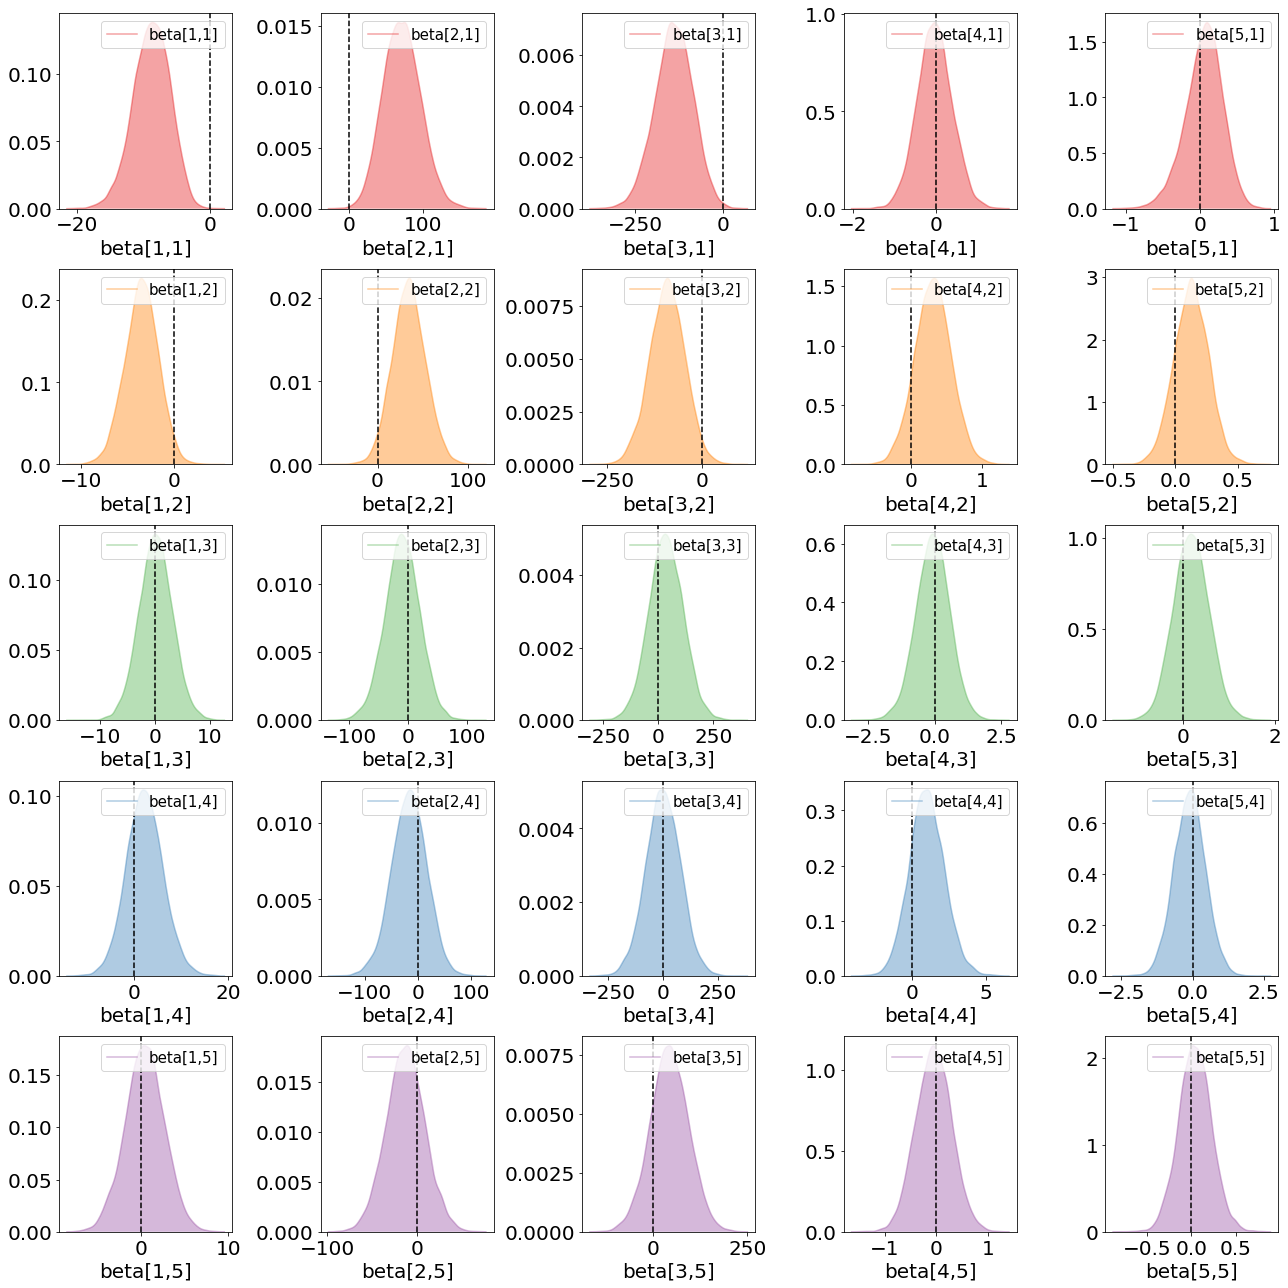

In [9]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [10]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_noshared.csv'))

In [11]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1,1]', 'beta[2,1]', 'beta[3,1]',
       'beta[4,1]', 'beta[5,1]', 'beta[1,2]', 'beta[2,2]',
       ...
       'eta05[898]', 'eta05[899]', 'eta05[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=9035)

In [12]:
header = np.array(entire_fit.keys())

In [13]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [14]:
probabilities = entire_fit[prob_keys]

In [15]:
probabilities

,prob01[1],prob01[2],prob01[3],prob01[4],prob01[5],prob01[6],prob01[7],prob01[8],prob01[9],prob01[10],...,prob05[891],prob05[892],prob05[893],prob05[894],prob05[895],prob05[896],prob05[897],prob05[898],prob05[899],prob05[900]
0,0.003004,0.006235,0.012383,0.023492,0.042431,0.072657,0.117381,0.178111,0.253170,0.337335,...,0.708043,0.713574,0.717287,0.719224,0.719407,0.717838,0.714500,0.709354,0.702345,0.693400
1,0.290831,0.442114,0.596254,0.726325,0.821410,0.884884,0.925311,0.950631,0.966512,0.976590,...,0.227231,0.251440,0.277510,0.305402,0.335029,0.366257,0.398900,0.432722,0.467442,0.502739
2,0.003658,0.006828,0.012302,0.021362,0.035691,0.057236,0.087877,0.128851,0.180113,0.239922,...,0.770664,0.781910,0.793239,0.804594,0.815917,0.827149,0.838234,0.849119,0.859752,0.870087
3,0.005393,0.008989,0.014538,0.022799,0.034630,0.050898,0.072313,0.099231,0.131470,0.168213,...,0.939976,0.935302,0.929736,0.923128,0.915297,0.906026,0.895059,0.882094,0.866783,0.848733
4,0.051150,0.082123,0.126211,0.184885,0.257312,0.339829,0.426584,0.511192,0.588478,0.655409,...,0.450134,0.479782,0.510150,0.541017,0.572139,0.603253,0.634090,0.664381,0.693868,0.722313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.045369,0.101763,0.205791,0.362483,0.544844,0.707425,0.824124,0.897039,0.939548,0.963769,...,0.420200,0.413840,0.406492,0.398176,0.388917,0.378745,0.367699,0.355824,0.343174,0.329810
11996,0.008408,0.015629,0.027816,0.047277,0.076490,0.117422,0.170590,0.234305,0.304661,0.376468,...,0.873554,0.880699,0.887221,0.893170,0.898594,0.903536,0.908036,0.912128,0.915846,0.919220
11997,0.151186,0.199774,0.256731,0.320541,0.388771,0.458441,0.526551,0.590561,0.648700,0.700028,...,0.166998,0.178654,0.192013,0.207260,0.224591,0.244208,0.266308,0.291073,0.318653,0.349143
11998,0.029865,0.042417,0.058804,0.079515,0.104808,0.134608,0.168449,0.205470,0.244496,0.284172,...,0.531241,0.568943,0.609589,0.652322,0.696053,0.739527,0.781441,0.820581,0.855959,0.886914


In [16]:
probabilities_transposed = probabilities.T

In [17]:
print(probabilities_transposed.columns)

RangeIndex(start=0, stop=12000, step=1)


In [18]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

12000


In [19]:
probabilities_transposed.columns = new_header

In [20]:
probabilities_transposed

,itr0,itr1,itr2,itr3,itr4,itr5,itr6,itr7,itr8,itr9,...,itr11990,itr11991,itr11992,itr11993,itr11994,itr11995,itr11996,itr11997,itr11998,itr11999
prob01[1],0.003004,0.290831,0.003658,0.005393,0.051150,0.027390,0.267561,0.010277,0.106027,0.011878,...,0.067474,0.036472,0.047020,0.002114,0.068555,0.045369,0.008408,0.151186,0.029865,0.071972
prob01[2],0.006235,0.442114,0.006828,0.008989,0.082123,0.051265,0.371483,0.019172,0.171538,0.019781,...,0.099337,0.062607,0.069860,0.002741,0.099091,0.101763,0.015629,0.199774,0.042417,0.097055
prob01[3],0.012383,0.596254,0.012302,0.014538,0.126211,0.090911,0.481114,0.034432,0.260249,0.031880,...,0.141098,0.102741,0.100724,0.003529,0.138036,0.205791,0.027816,0.256731,0.058804,0.127939
prob01[4],0.023492,0.726325,0.021362,0.022799,0.184885,0.151468,0.585117,0.059307,0.367788,0.049633,...,0.192954,0.160201,0.140625,0.004509,0.185113,0.362483,0.047277,0.320541,0.079515,0.164716
prob01[5],0.042431,0.821410,0.035691,0.034630,0.257312,0.235083,0.675315,0.097492,0.483531,0.074507,...,0.253736,0.235945,0.189763,0.005718,0.238937,0.544844,0.076490,0.388771,0.104808,0.206999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
prob05[896],0.717838,0.366257,0.827149,0.906026,0.603253,0.390368,0.308082,0.727652,0.849320,0.541779,...,0.861942,0.498473,0.690080,0.798082,0.913657,0.378745,0.903536,0.244208,0.739527,0.334789
prob05[897],0.714500,0.398900,0.838234,0.895059,0.634090,0.407802,0.331242,0.773120,0.866362,0.591710,...,0.854996,0.516998,0.717942,0.806060,0.930245,0.367699,0.908036,0.266308,0.781441,0.377302
prob05[898],0.709354,0.432722,0.849119,0.882094,0.664381,0.424190,0.355751,0.814766,0.883041,0.642327,...,0.847296,0.536771,0.745260,0.814176,0.943989,0.355824,0.912128,0.291073,0.820581,0.422951
prob05[899],0.702345,0.467442,0.859752,0.866783,0.693868,0.439453,0.381559,0.851769,0.899023,0.692286,...,0.838777,0.557711,0.771736,0.822393,0.955274,0.343174,0.915846,0.318653,0.855959,0.471137


In [21]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [22]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305
prob01[2],12000.0,0.104951,0.150406,1.371164e-07,0.000141,0.007609,0.039265,0.136041,0.556835,0.949220
prob01[3],12000.0,0.145730,0.190301,2.019788e-07,0.000211,0.012008,0.061693,0.204627,0.687176,0.969524
prob01[4],12000.0,0.191988,0.228614,2.902698e-07,0.000310,0.018102,0.092585,0.292488,0.801003,0.981341
prob01[5],12000.0,0.241145,0.262348,4.069842e-07,0.000430,0.026374,0.132227,0.390035,0.877860,0.988299
...,...,...,...,...,...,...,...,...,...,...
prob05[896],12000.0,0.685618,0.207266,3.533135e-02,0.220923,0.549461,0.728638,0.853837,0.966608,0.996685
prob05[897],12000.0,0.710641,0.198720,4.098793e-02,0.252450,0.586364,0.756199,0.870228,0.970692,0.996920
prob05[898],12000.0,0.735176,0.190919,4.788879e-02,0.279884,0.621384,0.782928,0.887069,0.974701,0.997307
prob05[899],12000.0,0.758613,0.184299,5.633065e-02,0.304034,0.656761,0.809272,0.902919,0.979067,0.998035


In [23]:
print(shrinked_df.values.shape, parameters.shape)

(4500, 10) (4500, 2)


In [24]:
loc = shrinked_df.iloc[0, :].size
print(loc)

10


In [25]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [26]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [27]:
shrinked_df

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305,9.729482,0.067940
prob01[2],12000.0,0.104951,0.150406,1.371164e-07,0.000141,0.007609,0.039265,0.136041,0.556835,0.949220,9.729482,0.077608
prob01[3],12000.0,0.145730,0.190301,2.019788e-07,0.000211,0.012008,0.061693,0.204627,0.687176,0.969524,9.729482,0.087275
prob01[4],12000.0,0.191988,0.228614,2.902698e-07,0.000310,0.018102,0.092585,0.292488,0.801003,0.981341,9.729482,0.096943
prob01[5],12000.0,0.241145,0.262348,4.069842e-07,0.000430,0.026374,0.132227,0.390035,0.877860,0.988299,9.729482,0.106610
...,...,...,...,...,...,...,...,...,...,...,...,...
prob05[896],12000.0,0.685618,0.207266,3.533135e-02,0.220923,0.549461,0.728638,0.853837,0.966608,0.996685,11.678570,0.309630
prob05[897],12000.0,0.710641,0.198720,4.098793e-02,0.252450,0.586364,0.756199,0.870228,0.970692,0.996920,11.678570,0.319297
prob05[898],12000.0,0.735176,0.190919,4.788879e-02,0.279884,0.621384,0.782928,0.887069,0.974701,0.997307,11.678570,0.328965
prob05[899],12000.0,0.758613,0.184299,5.633065e-02,0.304034,0.656761,0.809272,0.902919,0.979067,0.998035,11.678570,0.338632


In [28]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'))

In [29]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [30]:
zu = np.unique(prob02['LOG_STELLAR_MASS'].values)

In [31]:
subset = prob02[prob02['LOG_STELLAR_MASS'].values==zu[0]]

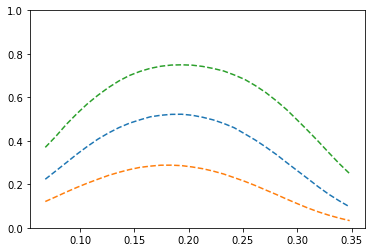

In [32]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,1.])
plt.show()

In [33]:
np.unique(prob01['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [34]:
subset = prob01[prob01['Z']<0.07]

In [35]:
subset

,count,mean,std,min,2.5%,25%,50%,75%,97.5%,max,LOG_STELLAR_MASS,Z
prob01[1],12000.0,0.071732,0.112948,9.081398e-08,0.000091,0.004769,0.024231,0.086291,0.416974,0.914305,9.729482,0.06794
prob01[31],12000.0,0.054594,0.081921,3.625932e-07,0.000165,0.005259,0.021979,0.068448,0.295553,0.802335,9.796692,0.06794
prob01[61],12000.0,0.042085,0.058433,1.342719e-06,0.000275,0.005793,0.020057,0.054566,0.211309,0.635979,9.863902,0.06794
prob01[91],12000.0,0.033385,0.042193,3.561931e-06,0.000457,0.006240,0.018399,0.043724,0.153631,0.473668,9.931112,0.06794
prob01[121],12000.0,0.027513,0.031724,8.768233e-06,0.000684,0.006674,0.016788,0.036641,0.117658,0.327333,9.998322,0.06794
prob01[151],12000.0,0.023629,0.025302,2.012379e-05,0.000969,0.006822,0.015169,0.031678,0.095190,0.248968,10.065532,0.06794
prob01[181],12000.0,0.021122,0.021560,4.306020e-05,0.001239,0.006789,0.014231,0.027829,0.081437,0.216847,10.132742,0.06794
prob01[211],12000.0,0.019582,0.019598,8.590284e-05,0.001422,0.006589,0.013488,0.025565,0.072602,0.207470,10.199952,0.06794
prob01[241],12000.0,0.018740,0.018873,1.243747e-04,0.001451,0.006425,0.012832,0.024314,0.069121,0.217954,10.267161,0.06794
prob01[271],12000.0,0.018418,0.019064,1.261703e-04,0.001401,0.006194,0.012320,0.023591,0.069313,0.229535,10.334371,0.06794


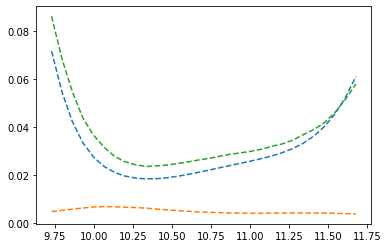

In [36]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [38]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_noshared.csv'))

In [39]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.072,0.000977,0.1139.12e-5,0.005,0.024,0.086,0.417,13374.000,1.0,X,0.067940,9.729482
1,prob01[2],0.105,0.001000,0.151.41e-4,0.008,0.039,0.136,0.557,13203.000,1.0,X,0.077608,9.729482
2,prob01[3],0.146,0.002000,0.192.11e-4,0.012,0.062,0.205,0.688,12685.000,1.0,X,0.087275,9.729482
3,prob01[4],0.192,0.002000,0.229,3.1e-4,0.018,0.093,0.293,0.801,12040,1.0,0.096943,9.729482
4,prob01[5],0.241,0.002000,0.2624.29e-4,0.026,0.132,0.390,0.878,11374.000,1.0,X,0.106610,9.729482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,prob05[896],0.686,0.002000,0.207,0.221,0.549,0.729,0.854,0.967,14068,1.0,0.309630,11.678570
4496,prob05[897],0.711,0.002000,0.199,0.252,0.586,0.756,0.870,0.971,14019,1.0,0.319297,11.678570
4497,prob05[898],0.735,0.002000,0.191,0.28,0.621,0.783,0.887,0.975,13771,1.0,0.328965,11.678570
4498,prob05[899],0.759,0.002000,0.184,0.304,0.657,0.809,0.903,0.979,13338,1.0,0.338632,11.678570


In [40]:
prob01_stan = summary_stan.iloc[:900, :]

In [41]:
prob01_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.072,0.000977,0.1139.12e-5,0.005,0.024,0.086,0.417,13374.000,1.0,X,0.067940,9.729482
1,prob01[2],0.105,0.001000,0.151.41e-4,0.008,0.039,0.136,0.557,13203.000,1.0,X,0.077608,9.729482
2,prob01[3],0.146,0.002000,0.192.11e-4,0.012,0.062,0.205,0.688,12685.000,1.0,X,0.087275,9.729482
3,prob01[4],0.192,0.002000,0.229,3.1e-4,0.018,0.093,0.293,0.801,12040,1.0,0.096943,9.729482
4,prob01[5],0.241,0.002000,0.2624.29e-4,0.026,0.132,0.390,0.878,11374.000,1.0,X,0.106610,9.729482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,prob01[896],0.579,0.002000,0.265,0.068,0.367,0.615,0.807,0.964,14417,1.0,0.309630,11.678570
896,prob01[897],0.553,0.002000,0.267,0.059,0.333,0.578,0.783,0.958,14904,1.0,0.319297,11.678570
897,prob01[898],0.521,0.002000,0.269,0.049,0.295,0.535,0.752,0.951,15379,1.0,0.328965,11.678570
898,prob01[899],0.485,0.002000,0.271,0.039,0.253,0.483,0.716,0.943,15743,1.0,0.338632,11.678570


In [42]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[0]

In [43]:
chosen_mass

9.729482

In [44]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [45]:
subset_temp

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,prob01[1],0.072,0.000977,0.1139.12e-5,0.005,0.024,0.086,0.417,13374.000,1.0,X,0.067940,9.729482
1,prob01[2],0.105,0.001000,0.151.41e-4,0.008,0.039,0.136,0.557,13203.000,1.0,X,0.077608,9.729482
2,prob01[3],0.146,0.002000,0.192.11e-4,0.012,0.062,0.205,0.688,12685.000,1.0,X,0.087275,9.729482
3,prob01[4],0.192,0.002000,0.229,3.1e-4,0.018,0.093,0.293,0.801,12040,1.0,0.096943,9.729482
4,prob01[5],0.241,0.002000,0.2624.29e-4,0.026,0.132,0.390,0.878,11374.000,1.0,X,0.106610,9.729482
5,prob01[6],0.291,0.003000,0.295.47e-4,0.037,0.183,0.496,0.924,10769.000,1.0,X,0.116278,9.729482
6,prob01[7],0.339,0.003000,0.3127.24e-4,0.05,0.244,0.592,0.953,10202.000,1.0,X,0.125946,9.729482
7,prob01[8],0.384,0.003000,0.3299.37e-4,0.066,0.312,0.679,0.970,9737.000,1.0,X,0.135613,9.729482
8,prob01[9],0.426,0.004000,0.34,0.001,0.086,0.382,0.750,0.981,9367,1.0,0.145281,9.729482
9,prob01[10],0.463,0.004000,0.348,0.001,0.108,0.448,0.806,0.988,9078,1.0,0.154948,9.729482


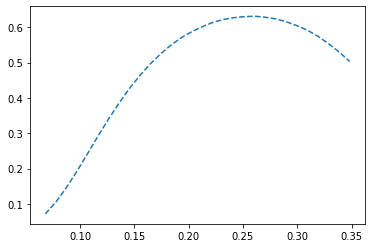

In [46]:
plt.plot(subset_temp['Z'].values, subset_temp['mean'].values, '--')
# plt.plot(subset_temp['Z'].values, subset_temp['25%'].values, '--')
# plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
# plt.yticks(list(np.arange(start=0., stop=1., step=0.02)))
plt.show()

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


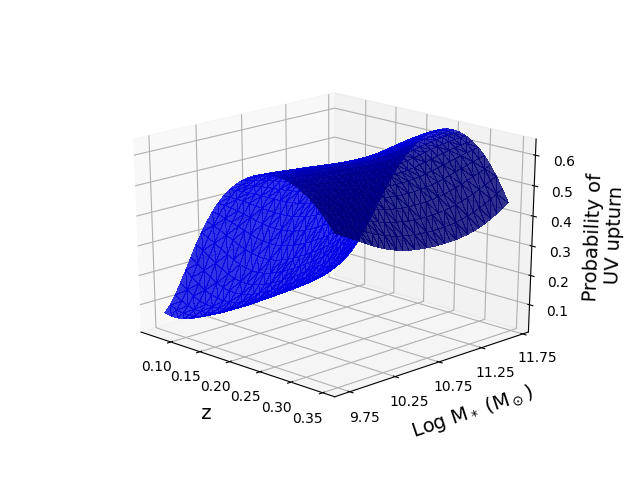

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
                linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
plt.show()

<IPython.core.display.Javascript object>


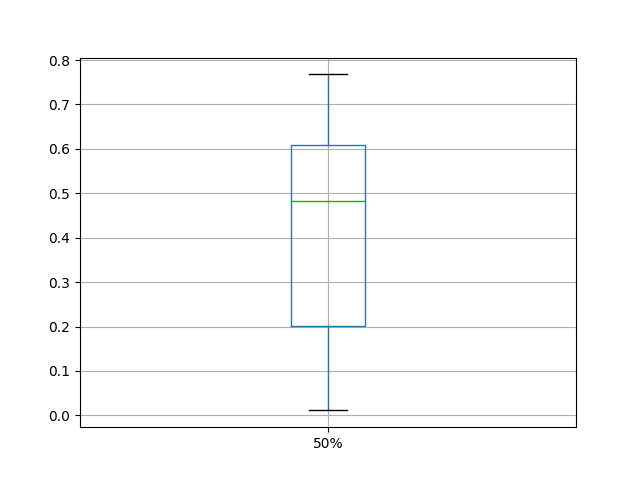

In [59]:
prob01.boxplot(column='50%')

<IPython.core.display.Javascript object>


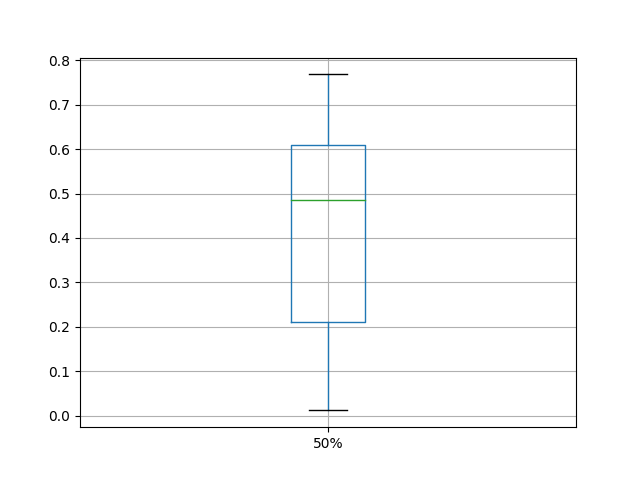

In [60]:
pd.DataFrame(prob01_stan['50%']).boxplot()

# Last check to be 100% sure (for one class - class 1 - lineless)

In [52]:
m = 1
z = np.arange(0., 0.5, 0.01)
p = posteriors

In [53]:
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))

        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [54]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [55]:
regression_df = pd.DataFrame(regression)
regression_df.columns = ['probability', 'redshift', 'iteration']

In [56]:
regression_df[regression_df['redshift']==0.2]

,probability,redshift,iteration
20,0.627362,0.2,0.0
70,0.546013,0.2,1.0
120,0.531681,0.2,2.0
170,0.532898,0.2,3.0
220,0.542236,0.2,4.0
...,...,...,...
599770,0.313566,0.2,11995.0
599820,0.628679,0.2,11996.0
599870,0.410498,0.2,11997.0
599920,0.487169,0.2,11998.0


In [57]:
plt.plot(redsh, prob, '-', alpha=0.2)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()